In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_conso_dep = pd.read_csv('datas/conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-departement.csv', sep=";")
df_conso_dep.head()

,operateur,annee,filiere,consoa,pdla,nombre_maille_secretisees_a,indquala,consoi,pdli,nombre_maille_secretisees_i,...,pdlna,nombre_maille_secretisees_na,indqualna,code_departement,libelle_departement,code_region,libelle_region,id_filiere,geom,consototale
0,Enedis,2011,Electricité,26490.69,334,0,0.957,838010.71,633,0,...,44,0,0.568,02,Aisne,32,Hauts-de-France,100,NaN,2855280.66
1,Enedis,2011,Electricité,25747.90,373,0,0.976,426364.02,553,0,...,47,0,0.871,03,Allier,84,Auvergne-Rhône-Alpes,100,NaN,2017190.64
2,Enedis,2011,Electricité,13601.05,118,0,0.946,105074.61,252,0,...,31,0,0.574,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur,100,NaN,1055358.03
3,Enedis,2011,Electricité,6611.47,62,0,0.949,44404.66,213,0,...,44,0,0.320,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur,100,NaN,937412.37
4,Enedis,2011,Electricité,33909.59,288,0,0.944,524680.83,561,0,...,35,0,0.461,10,Aube,44,Grand Est,100,NaN,1897584.71


In [55]:
df_conso_dep.columns

Index(['operateur', 'annee', 'filiere', 'consoa', 'pdla',
       'nombre_maille_secretisees_a', 'indquala', 'consoi', 'pdli',
       'nombre_maille_secretisees_i', 'indquali', 'consot', 'pdlt',
       'nombre_maille_secretisees_t', 'indqualt', 'consor', 'pdlr',
       'nombre_maille_secretisees_r', 'indqualr', 'consona', 'pdlna',
       'nombre_maille_secretisees_na', 'indqualna', 'code_departement',
       'libelle_departement', 'code_region', 'libelle_region', 'id_filiere',
       'geom', 'consototale'],
      dtype='object')

In [56]:
# On crée un nouveau dataframe, avec uniquement les données du Calvados, pour faires quelques essais.
df_conso_14 = df_conso_dep[df_conso_dep['code_departement'] == '14']
df_conso_14.head()

,operateur,annee,filiere,consoa,pdla,nombre_maille_secretisees_a,indquala,consoi,pdli,nombre_maille_secretisees_i,...,pdlna,nombre_maille_secretisees_na,indqualna,code_departement,libelle_departement,code_region,libelle_region,id_filiere,geom,consototale
7,Enedis,2011,Electricité,18773.25,175,0,0.916,875518.54,805,0,...,41,0,0.817,14,Calvados,28,Normandie,100,NaN,4176091.68
98,GRT Gaz,2011,Gaz,0.00,0,0,0.000,424730.13,5,0,...,0,0,0.000,14,Calvados,28,Normandie,200,NaN,424730.13
232,GRDF,2012,Gaz,12342.00,9,0,1.000,662270.00,130,0,...,11,1,1.000,14,Calvados,28,Normandie,200,NaN,3541268.00
296,Enedis,2013,Electricité,19696.14,178,0,0.909,843745.59,912,0,...,46,0,0.859,14,Calvados,28,Normandie,100,NaN,4460266.28
351,RTE,2013,Electricité,0.00,0,0,0.000,17093.90,2,0,...,0,0,0.000,14,Calvados,28,Normandie,100,NaN,60785.78


In [59]:
del df_conso_14['operateur']
# On fait un group by pour avoir une seule ligne par filière
df_conso_14 = df_conso_14.groupby(['annee', 'filiere', 'code_departement','libelle_departement', 'code_region', 'libelle_region']).sum() 
# On fait un reset index pour pouvoir accéder aux colonnes du group by comme avant
df_conso_14 = df_conso_14.reset_index()
df_conso_14


,annee,filiere,code_departement,libelle_departement,code_region,libelle_region,consoa,pdla,nombre_maille_secretisees_a,indquala,...,pdlr,nombre_maille_secretisees_r,indqualr,consona,pdlna,nombre_maille_secretisees_na,indqualna,id_filiere,geom,consototale
0,2011,Electricité,14,Calvados,28,Normandie,18773.250000,175,0,0.916,...,425303,0,0.322,4200.090000,41,0,0.817,100,0.0,4.176092e+06
1,2011,Gaz,14,Calvados,28,Normandie,12163.000000,9,0,1.000,...,112356,8,0.133,4145.000000,10,10,0.976,400,0.0,3.614704e+06
2,2012,Electricité,14,Calvados,28,Normandie,17896.980000,174,0,0.917,...,429837,1,0.356,3299.220000,54,0,0.919,200,0.0,4.446394e+06
3,2012,Gaz,14,Calvados,28,Normandie,12342.000000,9,0,1.000,...,112394,6,0.118,4408.000000,11,1,1.000,400,0.0,4.025741e+06
4,2013,Electricité,14,Calvados,28,Normandie,19696.140000,178,0,0.909,...,433203,2,0.414,4105.870000,46,0,0.859,200,0.0,4.521052e+06
5,2013,Gaz,14,Calvados,28,Normandie,12535.000000,9,0,1.000,...,112838,7,0.132,5635.000000,13,6,0.988,400,0.0,3.999399e+06
6,2014,Electricité,14,Calvados,28,Normandie,19990.720000,176,0,0.920,...,436839,1,0.409,1545.970000,45,0,0.749,200,0.0,4.201480e+06
7,2014,Gaz,14,Calvados,28,Normandie,10264.000000,9,0,1.000,...,113377,8,0.136,7093.000000,21,13,0.999,400,0.0,3.492847e+06
8,2015,Electricité,14,Calvados,28,Normandie,21037.600000,180,0,0.939,...,439384,1,0.411,1562.610000,40,0,0.925,200,0.0,4.304885e+06
9,2015,Gaz,14,Calvados,28,Normandie,10115.000000,9,0,1.000,...,117254,12,0.106,13770.000000,31,14,1.000,400,0.0,3.613744e+06


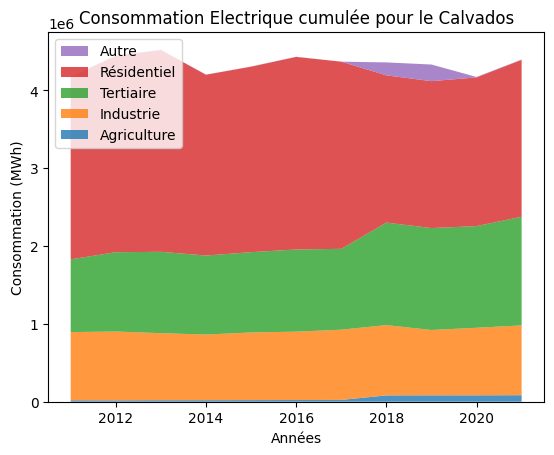

In [66]:
df_conso_14_elec = df_conso_14[df_conso_14['filiere'] == 'Electricité']
list(df_conso_14_elec['annee'])

annee = list(df_conso_14_elec['annee'])
consommation_par_categorie = {
    'Agriculture': list(df_conso_14_elec['consoa']),
    'Industrie': list(df_conso_14_elec['consoi']),
    'Tertiaire': list(df_conso_14_elec['consot']),
    'Résidentiel': list(df_conso_14_elec['consor']),
    'Autre': list(df_conso_14_elec['consona']),
}

fig, ax = plt.subplots()
ax.stackplot(annee, consommation_par_categorie.values(),
             labels=consommation_par_categorie.keys(), alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('Consommation Electrique cumulée pour le Calvados')
ax.set_xlabel('Années')
ax.set_ylabel('Consommation (MWh)')

plt.show()

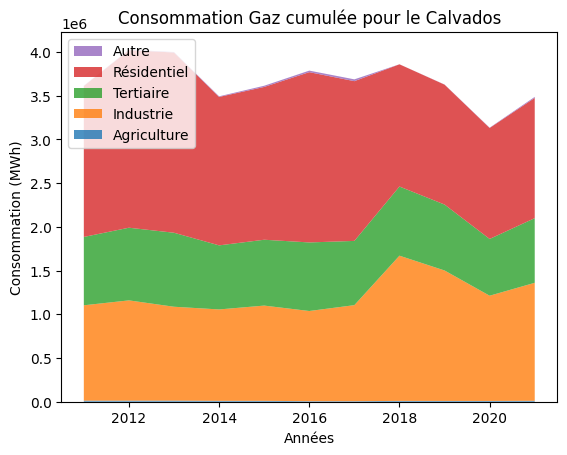

In [67]:
df_conso_14_gaz = df_conso_14[df_conso_14['filiere'] == 'Gaz']
list(df_conso_14_gaz['annee'])

annee = list(df_conso_14_gaz['annee'])
consommation_par_categorie = {
    'Agriculture': list(df_conso_14_gaz['consoa']),
    'Industrie': list(df_conso_14_gaz['consoi']),
    'Tertiaire': list(df_conso_14_gaz['consot']),
    'Résidentiel': list(df_conso_14_gaz['consor']),
    'Autre': list(df_conso_14_gaz['consona']),
}

fig, ax = plt.subplots()
ax.stackplot(annee, consommation_par_categorie.values(),
             labels=consommation_par_categorie.keys(), alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('Consommation Gaz cumulée pour le Calvados')
ax.set_xlabel('Années')
ax.set_ylabel('Consommation (MWh)')

plt.show()